# Titanic

Found in [kaggle/titanic](https://www.kaggle.com/c/titanic)

<img style="float: left;" src="https://kaggle2.blob.core.windows.net/competitions/kaggle/3136/logos/front_page.png">

## 1. Load the data

In [283]:
%matplotlib inline

import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from collections import Counter
from __future__ import division

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

## 2. Show the data

In [15]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [250]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [36]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. Plot the data

An interesting view would be initially on the sex distribution between the passengers.

In [187]:
sex_dist = Counter(train["Sex"].tolist())

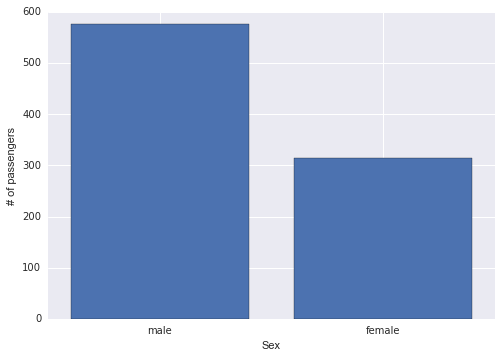

In [188]:
plt.bar([i+0.1 for i,_ in enumerate(sex_dist)],sex_dist.values())
plt.xticks([i+0.5 for i,_ in enumerate(sex_dist)],sex_dist.keys())
plt.xlabel("Sex")
plt.ylabel("# of passengers")

From the description of the problem (and the documentaries about Titanic) it _seems_ there is a correlation of survival between the sex and the fare/cabin of the passenger. These can be explored in the plots below: 

In [244]:
train.groupby(["Sex","Survived"]).count()["PassengerId"].unstack(["Survived"]).apply(lambda x: 100*x/float(x.sum()),axis=1)

Survived,0,1
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


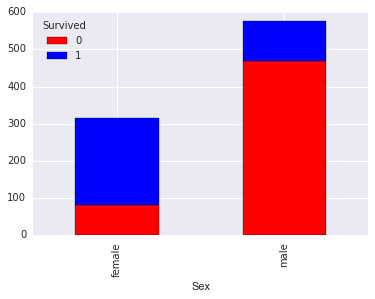

In [243]:
train.groupby(["Sex","Survived"]).count()["PassengerId"].unstack(["Survived"]).plot.bar(stacked=True,color=["r",["b"]])

It seems there is indeed a connection between the sex of the passengers and their survival rate.

In [242]:
train.groupby(["Pclass","Survived"]).count()["PassengerId"].unstack(["Survived"]).apply(lambda x: 100*x/float(x.sum()),axis=1)

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


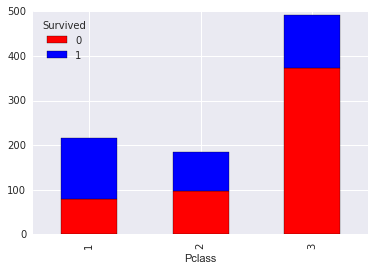

In [241]:
train.groupby(["Pclass","Survived"]).count()["PassengerId"].unstack(["Survived"]).plot.bar(stacked=True,color=["r",["b"]])

In [165]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## 4. Clean the data

From the current data the name and ticket number is deemed to be unimportant for the moment. Also, the Sex will become an integer (1 for female and 0 for male), the embarkement place (0 for S, 1 for C and 2 for Q) and the cabin (0 for people without cabin, 1 with cabin - regardless of the number))  
_(cleaning up by using panda methods apply, drop and replace)_

In [318]:
ctrain = train.drop(["Name","Ticket"],axis=1).replace({"Sex": {"female": 1, "male":0}})
ctrain["Cabin"]=ctrain["Cabin"].apply(lambda x: 1 if pd.notnull(x) else 0)

def embarked_letters_to_integers(letter):
    if letter == "S":
        return 0
    elif letter == "C":
        return 1
    elif letter == "Q":
        return 2

ctrain["Embarked"]=ctrain["Embarked"].apply(embarked_letters_to_integers)

In order to have an even better idea of the dataset, a histogram is printed for each column:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002DD2A518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002E691CF8>]], dtype=object)

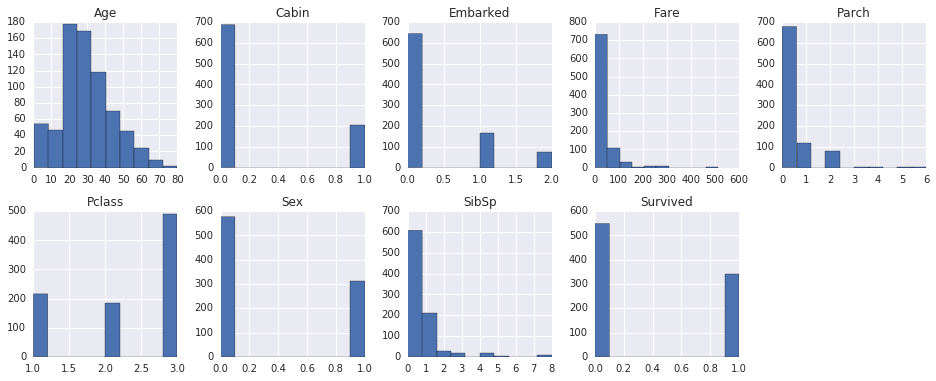

In [321]:
ctrain.drop(["PassengerId"],axis=1).hist(figsize=(16,6),layout=(2,5))

Also, the correlation matrix is created for the cleaned set of variables. It shows that indeed there might be a stronger correlation with Sex and Pclass.